### Dataset
Dataset is based on data from the 1990 California census. Given data shows that it has been collected by observing many subjects at the same point of time, or without regard to differences in time.Hence, we have a cross-sectional data at hand. Analysis of cross-sectional data usually consists of comparing the differences among the subjects.

### Problem Statement
Our task is to predict median house values in Californian districts, given a number of features from these districts. 
Aim of this study is to determine   
**Framing the problem <br>  Selecting most suitable model<br> Evaluating the model through performance measures<br>Validatig the model**

### First importing key libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading data

In [2]:
df=pd.read_csv('housing.csv')

In [3]:
df.head() # Showing 1st five rows'value by default

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Looking at this seems that we have all variables as numerical. Only "ocean_proximity" is categorical variable.
As we are interested in housing price so, "median_house_value" is variable of our interest. In econometrics, we call it dependent variable and is denoted as "y".

In [4]:
df.tail() # giving us last five rows'value

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


### Getting to know data

In [5]:
df.shape

(20640, 10)

We have ten columns.Hence, There are 10 attributes: longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value and ocean_proximity.
Note that index column is not included in it. We may include index by using set_index if needed. For now, we ll keep it like that
There 20640 rows representing district data. 

In [6]:
# The info() method is useful to get a quick description of the data
# in particular the total number of rows,
# and each attribute’s type and number of non-null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


As we have seen by shape that there are 20640 data points in our dataset. All variables have given number. Only "total_bedroom" has 20433. So, there are missing values. We need to address this problem.
But, first we will finish our data learning process.

In [7]:
# Let's look at the other fields.
# The describe() method shows a summary of the numerical attributes

df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Notice only numerical attributes are there. So, "ocean_proximity" is not there.
25%, 50%, 75% shows the corresponding percentiles
Points to Note:
25th percentile is called 1st quartile - 25% of the districts have a housing_median_age lower than 18.
50th percentile is called median - 50% of the districts have a housing_median_age lower than 29.
75th percentile is called 3rd quartile - 75% of the districts have a housing_median_age lower than 37.<br>
Check about mean and standard deviation. Mean shows average value while Standard deviation is a number used to tell how measurements for a group are spread out from the average (mean), or expected value.<br> A low standard deviation means that most of the numbers are very close to the average. A high standard deviation means that the numbers are spread out.

In [8]:
# wE can also take transverse of this function
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [9]:
# We can check individual attributes as well
df.housing_median_age.head()

0    41.0
1    21.0
2    52.0
3    52.0
4    52.0
Name: housing_median_age, dtype: float64

In [10]:
#Suppose we want to see any particular values at given data point then we can get that data by row number using iloc[]
df.housing_median_age.iloc[20638]


18.0

In [11]:
#We didnt see what our categorical variable contains
#Find out what categories exist
# and how many districts belong to each category by using the value_counts() method

df["ocean_proximity"].head()

0    NEAR BAY
1    NEAR BAY
2    NEAR BAY
3    NEAR BAY
4    NEAR BAY
Name: ocean_proximity, dtype: object

In [12]:
#It only shows 1st five values and we want to see how many more categories except of NEAR BAY we have at hand

df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

We can see we have 5 categories and how they are divided in dataset.

### Plotting

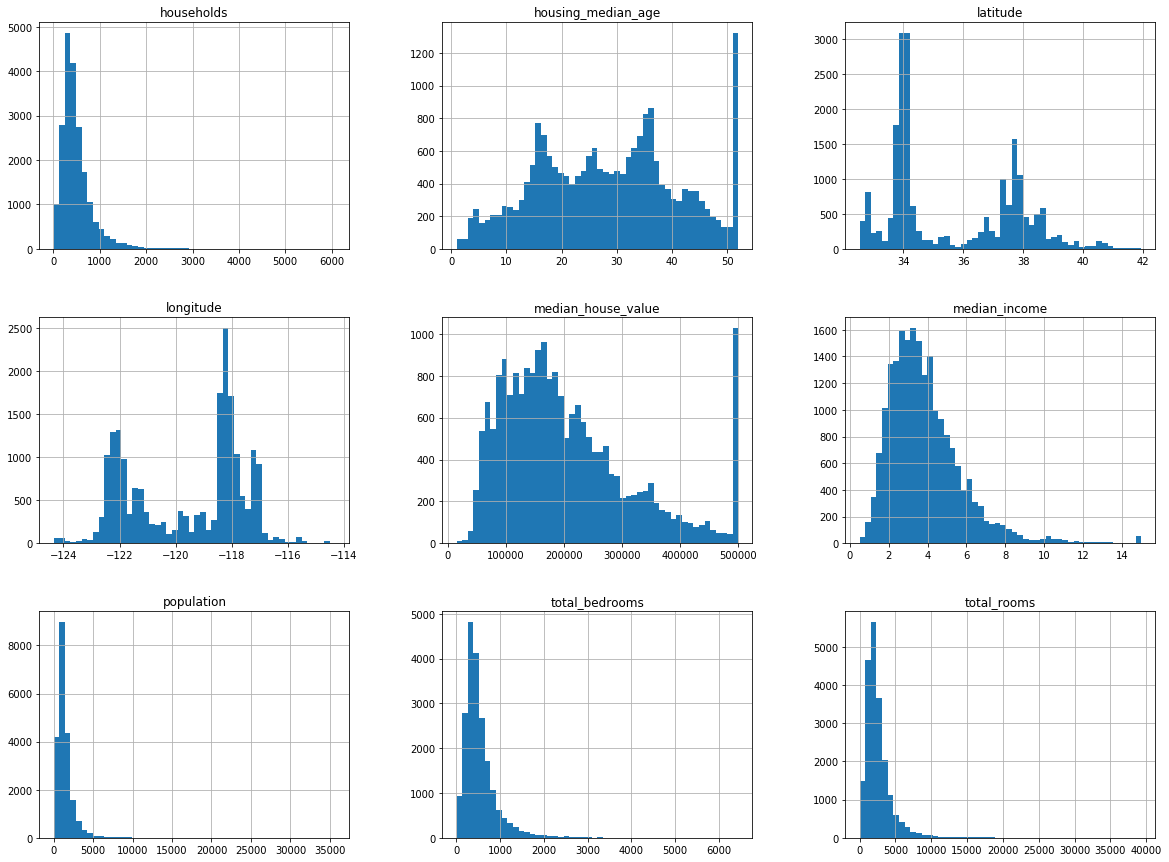

In [13]:
# Let's plot a histogram to get the feel of type of data we are dealing with
# We can plot histogram only for numerical attributres. Histogram is frequency of data within certain range.

%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

 **About the histogram:**   
 A histogram is used for continuous data, where the bins represent ranges of data.To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable

**About Results:**  
From above histograms it's clear that most of the features are skewed. It seems that **'housing_median_age'** and **'median_housing_value'** have been capped a the end (Peak at the end).
We can also see that 'population','total_bedrooms','total_rooms' are **right skewed** meaning that there is big tail on right side. We need to transform this tail based data to bell shaped distribution i.e normal distribution. 

### Don't Forget missing values

In [14]:
#Remember
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


"total_bedrooms" has missing data.So, we need to deal with it. Also, its histogram shows that this variable might need further treatment. For now, we are not sure if this skewed trend is due to missing values or what else. 

In [15]:
df[df.isnull().any(axis=1)].head() # using isnull() function

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY


Good thing is that we can see what are the data points where our variable has missing values. So, we do not need to inspect null values at random. As we know the points and places where there are missing values, it is much easier to address the problem.

### Alternative and efficient way of checking missing values

In [ ]:
# We will use "missingno" but, we need to install that 1st.
!conda install -c conda-forge pandas-profiling -y 

!pip install missingno

In [16]:
import missingno as msno

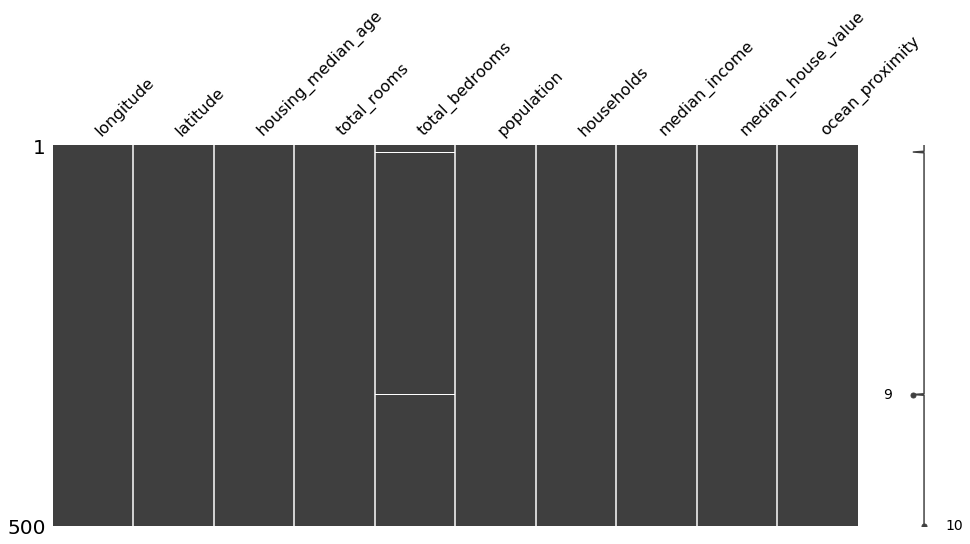

In [17]:
msno.matrix(df.sample(500),
            figsize=(16, 7),
            width_ratios=(15, 1))

In top 500 values, we see there are traces of white lines in variable total_bedrooms. Other variables are fully black and hence they show no sign of missing data. lets check for higher values.

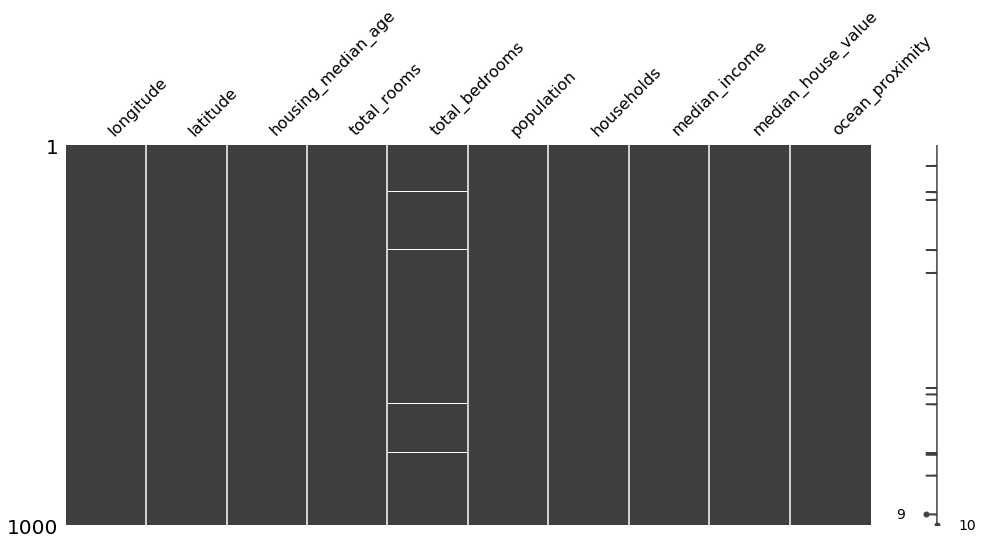

In [18]:
msno.matrix(df.sample(1000),
            figsize=(16, 7),
            width_ratios=(15, 1))

We see more of white strips. This shows how frequent these missing points are. They are not concentrated atleast for 1st 1000 values of total_bedrooms. 

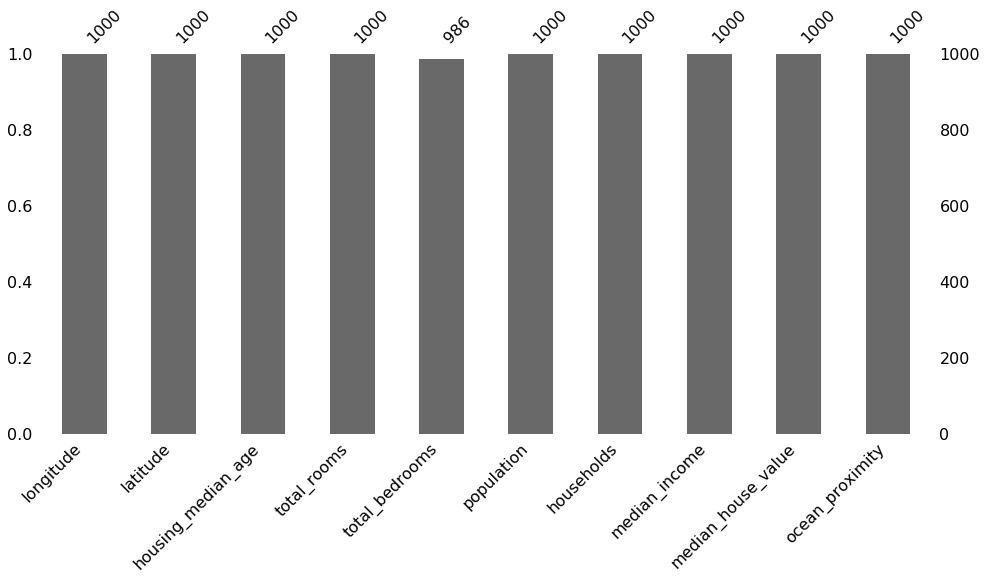

In [19]:
msno.bar(df.sample(1000),
            figsize=(16, 7),)

Out of 1000 values , we get 986 values of "total_bedrooms". It confirms more and more. Not only that, it visually make it easier to check all variables. In this data, we do not have huge problem of missing data as only one is under consideration since we run info()

In [ ]:
#msno.heatmap(df.sample(1000),
            #figsize=(16, 7),)
# This is useful when we want to see correlation between missing values of different variable. It wont work here as we have only 
# one infected variable

In [27]:
print("All variables:", len(df))
print("total_bedrooms_with_nulls:", len(df[(df.total_bedrooms.isnull())]))

All variables: 20640
total_bedrooms_with_nulls: 207


### Treatment of Missing values

There are three ways to solve this problem. None of them is perfect. They might suit according to dataset and problem statement.<br>
**Solution 1:**<br>
Get rid of those districts where total_bedrooms has missing values i.e rows <br>
Use function dropna()<br>

In [ ]:
data_option1=df.dropna(subset=["total_bedrooms"])
data_option1

In [29]:
data_option1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20433 non-null float64
latitude              20433 non-null float64
housing_median_age    20433 non-null float64
total_rooms           20433 non-null float64
total_bedrooms        20433 non-null float64
population            20433 non-null float64
households            20433 non-null float64
median_income         20433 non-null float64
median_house_value    20433 non-null float64
ocean_proximity       20433 non-null object
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


As a result of dropna(), we have zero missing values now. so our data with null values is empty. We could use this on our further analysis. For this analysis, it makes sense as there was only one variable. However; this might not be a good solution in a situation where two or more variables have missing values. Additionally, their location at data points might be different so removing one row means that we will remove some useful and valid value of other variable.

**Solution 2**<br> Get rid of whole attribute i.e column of total_bedrooms Use drop()

In [30]:
data_option2=df.drop("total_bedrooms", axis=1)
data_option2.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,NEAR BAY


As we have removed entire column, so there is no missing value. But, this might be even worse as we have lost an entire attribute and all those values might be useful.This may effect our analysis later. So, we need a better solution instead of removing these values. We rather wish to keep rows or columns.

**Solution 3**<br> Set given values with missing data with some values(zero, mean, median)<br> Use fillna()

In [31]:
median = df["total_bedrooms"].median()
median

435.0

In [35]:
df["total_bedrooms"].fillna(median, inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


We have all values and only we treated one variable. By removing those missing values might impact our analysis because other variables will have all of their values, Or we remove their row values too. That won't make much sense.Again, these solution depends on data we have.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020B7EE90860>]],
      dtype=object)

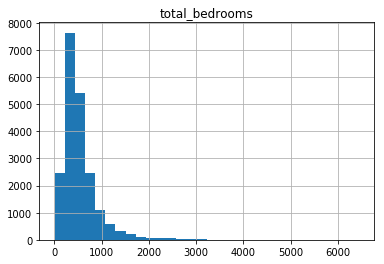

In [83]:
df.hist(column='total_bedrooms',bins=30)

Although we have got rid of missing values yet we have still issue of skewedness.

### Preparing for machine learning using sklearn

At this stage, we will divide our dataset into training and test dataset. Some tutorials have cleaned missing values after data is divided. However; it is good practice to deal with missing values and outlier before dividing data. I have not dealt with outlier issue yet. That's for later part.


In [39]:
#To make this notebook's output identical at every run
#we are going to set a seed for random number.we will use random numbers and these random are kind of pseudo random numbers 
#if the said seed is same the random number will always be the same. So if two users set the same seed, they will get the 
#same random number.
#in short, seed is the basis on which the random number is generated
np.random.seed(42)

In [41]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42) # this random state will avoid sample bias.
# Also using 80% , 20% divide is common in literature. There is no rule for this though.

In [42]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


In [43]:
train_set.shape

(16512, 10)

In [44]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,435.0,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,435.0,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,435.0,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,435.0,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,435.0,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


In [45]:
test_set.shape

(4128, 10)

### Checking relationship between variables

Visualizing is best way to see relationship between variables.

Text(0.5,1,'Distribution of households')

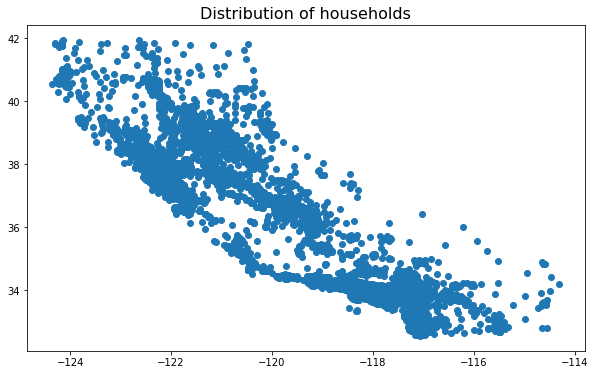

In [46]:
plt.figure(figsize=(10,6))
plt.scatter(x=train_set['longitude'],y=train_set['latitude'])
plt.title("Distribution of households",size=16)

Text(0.5,1,'Distribution of households')

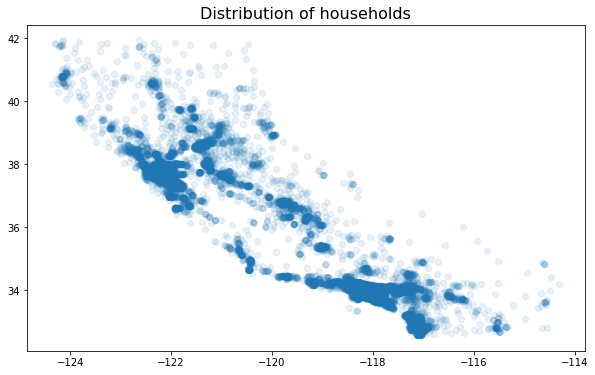

In [48]:
#If we want to see density of data points then we can set alpha=0.1
plt.figure(figsize=(10,6))
plt.scatter(x=train_set['longitude'],y=train_set['latitude'],alpha=0.1)
plt.title("Distribution of households",size=16)

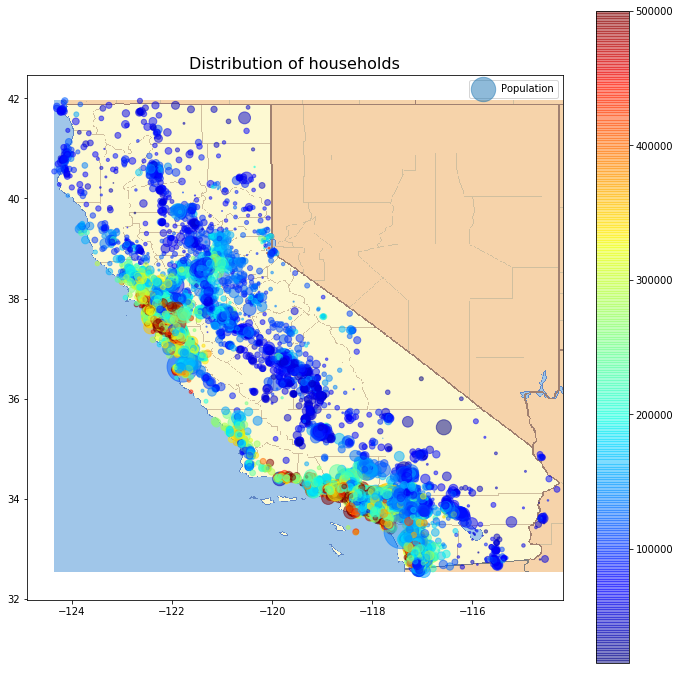

In [52]:
plt.figure(figsize=(12,12))
img=plt.imread('California.png')
plt.imshow(img,zorder=0,extent=[-124.35,-114.2,32.54,41.95])
#s : scalar or array_like, shape (n, ), optional
# : color, sequence, or sequence of color, optional, default: 'b
plt.scatter(x=train_set['longitude'],y=train_set['latitude'],alpha=0.5,s=train_set['population']/30,c=train_set['median_house_value'],
            cmap=plt.get_cmap("jet"),zorder=1,label='Population')
plt.colorbar()
plt.title("Distribution of households",size=16)
plt.legend()

As our dependent variable is housing_value. So check it with lattitude, longitude and also with population. Clearly location and population show interesting inferential analysis. <br>
1-If we see house_value goes lower to higher as it goes blue from red. We can see that places that are close to sea have higher prices especially in Central-West and West-South part shown by red dots. It is worth mentioning that house_value is lower in north as shown by couple of blue dots and only few light green ones.



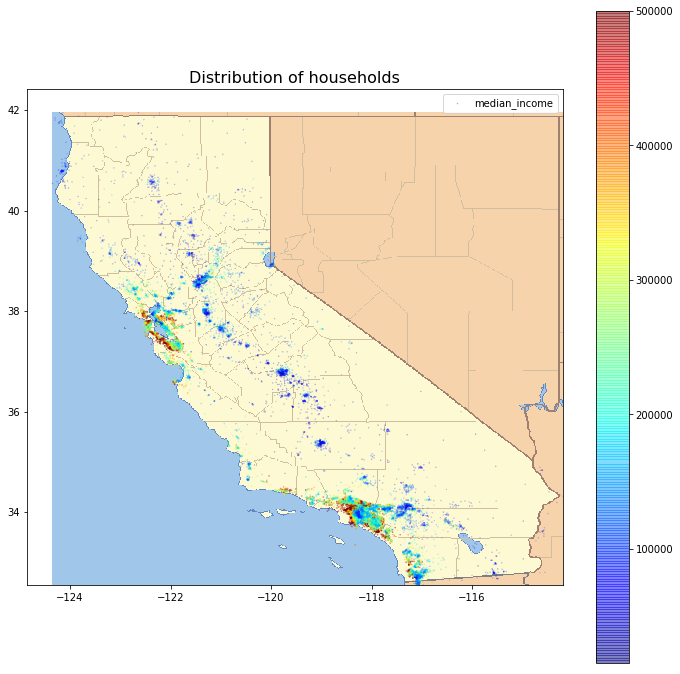

In [54]:
plt.figure(figsize=(12,12))
img=plt.imread('California.png')
plt.imshow(img,zorder=0,extent=[-124.35,-114.2,32.54,41.95])
#s : scalar or array_like, shape (n, ), optional
# : color, sequence, or sequence of color, optional, default: 'b
plt.scatter(x=train_set['longitude'],y=train_set['latitude'],alpha=0.5,s=train_set['median_income']/30,c=train_set['median_house_value'],
            cmap=plt.get_cmap("jet"),zorder=1,label='median_income')
plt.colorbar()
plt.title("Distribution of households",size=16)
plt.legend()

This graph confirms our assumption. As those who have higher median_income can afford to have higher value_house so they tend to live near sea in above mentioned zones. We have a distribution of income in certain areas whereas other areas look almost empty. It can be assumed that money begets money. Those places which have well-off people have a higher median_income neighbourhood. And they are clustered with this pattern. Those with lower income not only tend to go towards areas with low house value but, they tend to cluster around community of same social status

In [55]:
corr_matrix=train_set.corr()

In [56]:
# Finding relation of our dependant variable with others. 
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

house value has 1 value with its own value. With other variable, we do not see very high correlation. Only 69 %, 13% or 10% are of any significance. In fact, population is negatively related with house value meaning higher the value, lower will be population. It makes sense as people tend to move from richer neighbourhood if they cannot afford.
Number of rooms and age of house are also reasonable with house value. 

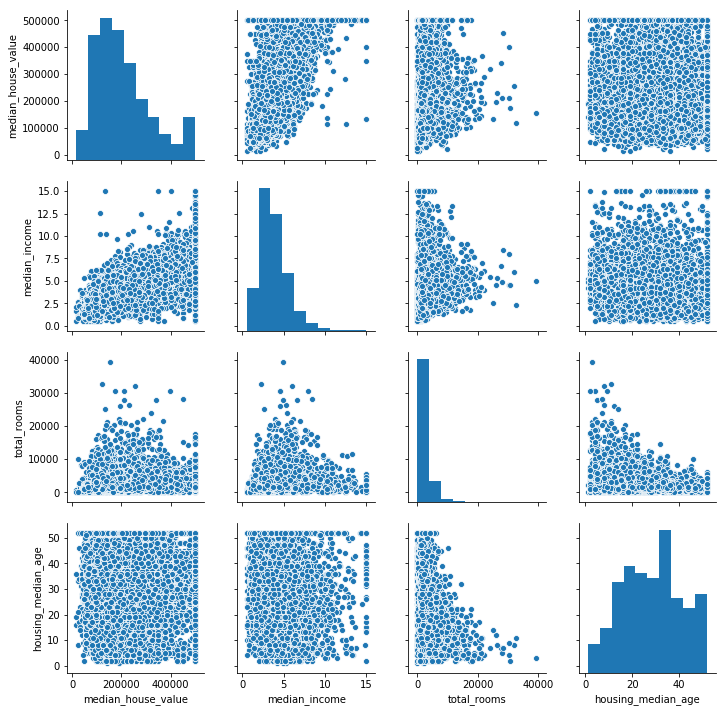

In [58]:
#using seaborn now for pairplot
sns.pairplot(train_set[['median_house_value','median_income','total_rooms','housing_median_age']])

Diagnal plot is of variable with its own value. Rest are with variables. We tend to find some pattern whether positive or negative. As we have seen income from above correlation, we expect income to have relation with house value.In the end of x-axis we observe an accumulation. Similary, we observe some caps in housing median age. Total_rooms does not make much sense from this. Hence, we cannot say that those values were actually higher enough to draw any relationship. Still, we ll keep these variable in mind.

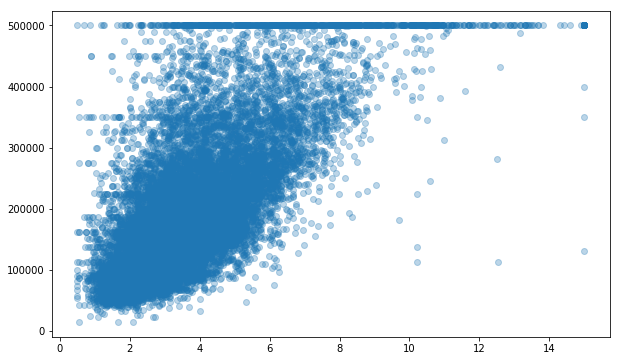

In [59]:
#Lets see more closely for only house value and median income

plt.figure(figsize=(10,6))
plt.scatter(y=train_set['median_house_value'],x=train_set['median_income'],alpha=0.3)

As noted above, a clear line can be seen at 500k at which the data is capped.another is 450, 350 and even slight hint down at 250k. But what's wrong with capped data? This kind of data may degrade the performance of model.
Values of all other elements should be uniformly increased. This hints to outlier problem in our data. 

In [75]:
train_set['median_house_value'].max()

500001.0

In [76]:
train_set['median_house_value'].min()

14999.0

Check how big is this difference in minimum and maximum. This creates gap in median income variable so high that we had possibility of outlier

In [77]:
train_set['median_house_value'].mean()

207194.6937378876

In [78]:
train_set['median_house_value'].std()

115622.62644809265

Again check this huge difference in std deviation and mean. 

In [79]:
train_set[(train_set['median_house_value'] > 400000.0)].count()

longitude             1405
latitude              1405
housing_median_age    1405
total_rooms           1405
total_bedrooms        1405
population            1405
households            1405
median_income         1405
median_house_value    1405
ocean_proximity       1405
dtype: int64

In [80]:
train_set[(train_set['median_house_value'] > 500000.0)].count()

longitude             786
latitude              786
housing_median_age    786
total_rooms           786
total_bedrooms        786
population            786
households            786
median_income         786
median_house_value    786
ocean_proximity       786
dtype: int64

We see 50 K and 40 K are so much above mean and still there are so many values at that higher range meaning house value is too high.

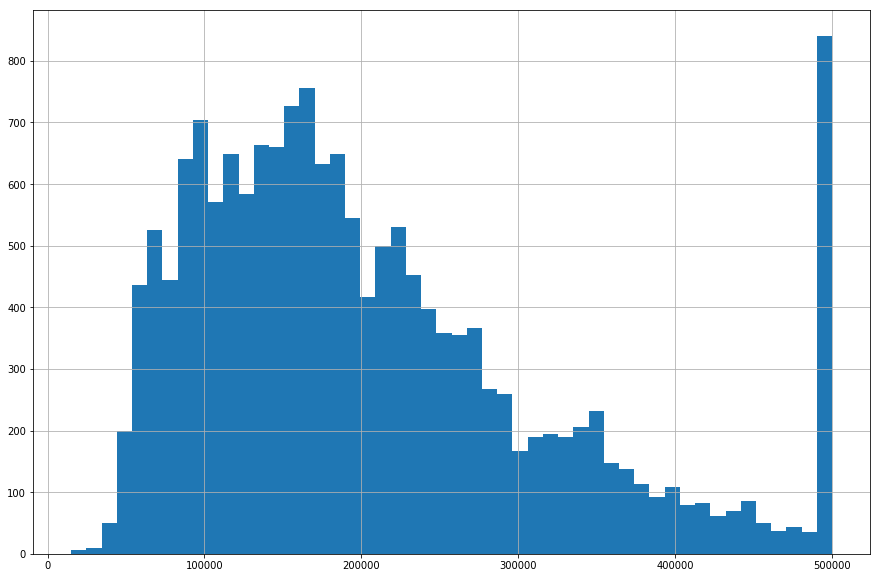

In [86]:
train_set.median_house_value.hist(bins=50,figsize=(15,10))

So, we can finally see problem of capped data. Enough of proof, lets solve it

In [90]:
train_set['median_house_value'].boxplot(return_type='dict')
plt.plot

AttributeError: 'Series' object has no attribute 'boxplot'